### Decision Tree Regression
#### Note: A decision tree is a non-parametric ML model.
#### Linear/Logistic regression is a parametric model.

In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

### Prepare data: y = x/2 + six(x) + Gaussian Noise (0, 1)

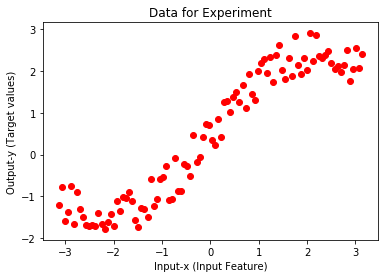

In [2]:
nsamp = 100
x = np.linspace(-np.pi, np.pi, nsamp)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x,y,color='red')
plt.xlabel('Input-x (Input Feature)')
plt.ylabel('Output-y (Target values)')
plt.title('Data for Experiment')
plt.show()

### Split the dataset into Training (70%), Validation (15%), and Testing (15%).

In [3]:
random_indices = np.random.permutation(nsamp)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

### A decision tree learns a piece-wise linear fit to the data.

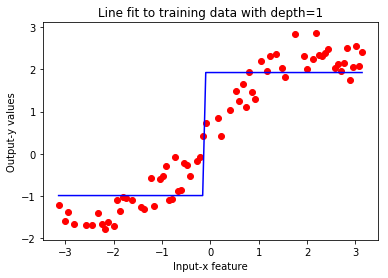

Training MSE:  0.3326111544760806 
Validation MSE:  0.4203268778925738 
Test MSE:  0.559194969752197


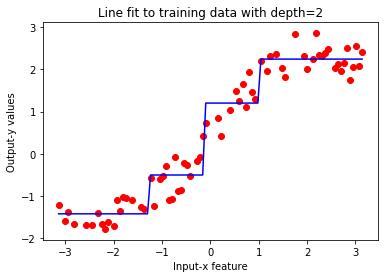

Training MSE:  0.11262729799286976 
Validation MSE:  0.2223286732159064 
Test MSE:  0.21971746628975225


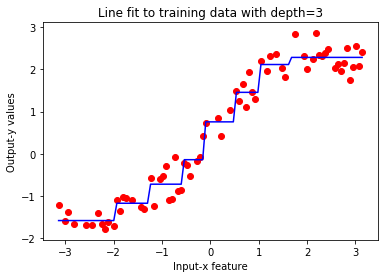

Training MSE:  0.06483959948081638 
Validation MSE:  0.2228707656371154 
Test MSE:  0.17044148761815228


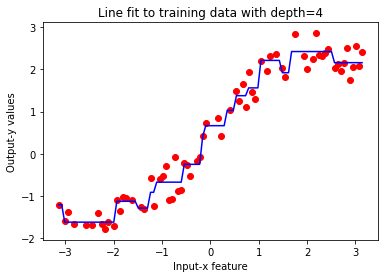

Training MSE:  0.047076759036436655 
Validation MSE:  0.2039418353920855 
Test MSE:  0.1459020825901368


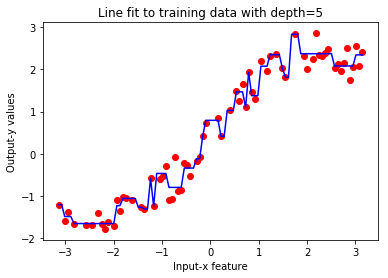

Training MSE:  0.027261064853385475 
Validation MSE:  0.30890898480315104 
Test MSE:  0.19038724071575205


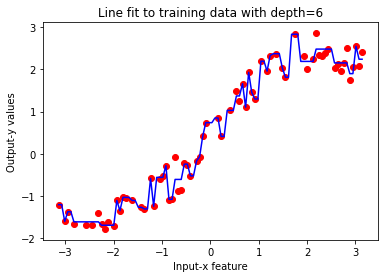

Training MSE:  0.014928135267298377 
Validation MSE:  0.31564065935234387 
Test MSE:  0.19746418785713954


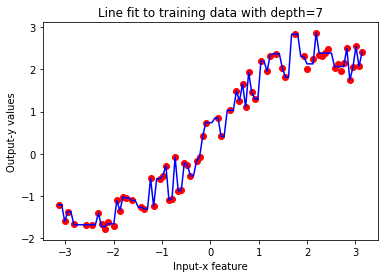

Training MSE:  0.0010954932179863877 
Validation MSE:  0.3120932593999299 
Test MSE:  0.21600361633264356


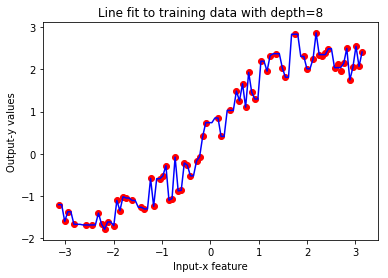

Training MSE:  0.00021927708798983334 
Validation MSE:  0.3107827115887593 
Test MSE:  0.23113321206218226


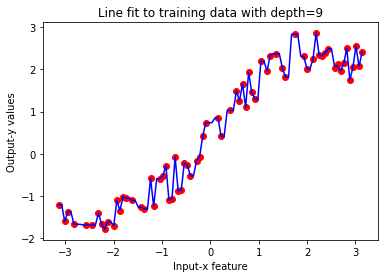

Training MSE:  6.009078003352451e-05 
Validation MSE:  0.31078059173806066 
Test MSE:  0.23110764135002856


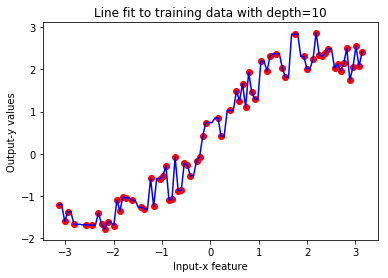

Training MSE:  0.0 
Validation MSE:  0.31078059173806066 
Test MSE:  0.23110764135002856


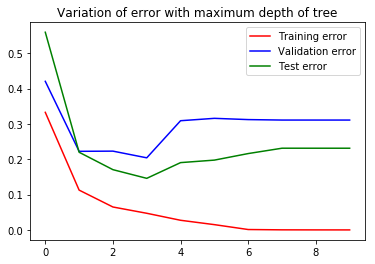

In [4]:
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in range(1, 11):
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices (reshpae the arrays into column matrices)
    x_train_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_fitting, y_train_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('Input-x feature')
    plt.ylabel('Output-y values')
    plt.title('Line fit to training data with depth='+str(depth))
    plt.show()
    
    train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(train_error)
    val_err_arr.append(val_error)
    test_err_arr.append(test_error)

    print('Training MSE: ', train_error, '\nValidation MSE: ', val_error, '\nTest MSE: ', test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()